In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## 주가 분석 (수정)

import pandas as pd

csv = ['naver_fins_088260(이리츠코크랩).csv',
      'naver_fins_140910(에이리츠).csv',
      'naver_fins_145270(케이탑리츠).csv',
      'naver_fins_204210(모두투어리츠).csv',
      'naver_fins_293940(신한알파리츠).csv',
      'naver_fins_330590(롯데리츠).csv',
      'naver_fins_338100(NH프라임리츠).csv']

dfs = []

for i in range(7):
    temp = pd.read_csv(csv[i], header=0, index_col = 'date')
    
    ## object -> int
    temp["price"] = temp["price"].apply(lambda x: str(x.replace(',','')))
    temp["amt"] = temp["amt"].apply(lambda x: str(x.replace(',','')))
    temp = temp.astype({'price': 'int', 'amt': 'int'})
    
    ## 가격변동량, 가격변동률(%) 칼럼 추가
    temp['price_diff'] = (temp.price - temp.price.shift(-1)).fillna(0)
    temp['price_change'] = ((temp.price - temp.price.shift(-1)) /temp.price.shift(-1) *100).fillna(0)
    pd.options.display.float_format = '{:.2f}'.format  # 소수점 표기 옵션 변경(소수점 2째 자리까지)
    #temp['date_new'] = pd.to_datetime(dfs.index, format= '%Y.%m.%d')
    
    dfs.append(temp)

dfs    # 개별로 보고 싶으면 0~6 사이의 숫자 입력
dfs[0]

,price,amt,price_diff,price_change
date,,,,
2020.12.30,5410,51461,-10.00,-0.18
2020.12.29,5420,56016,-120.00,-2.17
2020.12.28,5540,111139,-20.00,-0.36
2020.12.24,5560,76904,80.00,1.46
2020.12.23,5480,28370,0.00,0.00
...,...,...,...,...
2020.01.08,6540,120701,-20.00,-0.30
2020.01.07,6560,65422,-80.00,-1.20
2020.01.06,6640,86859,-90.00,-1.34


In [3]:
new_df = dfs[0] + dfs[1] + dfs[2] + dfs[3] + dfs[4] + dfs[5] + dfs[6]

## 가격변동량, 가격변화율은 개별의 합과는 차이가 발생할 수 있으므로 싹 다 수정
new_df['price_diff'] = (new_df.price - new_df.price.shift(-1)).fillna(0)
new_df['price_change'] = ((new_df.price - new_df.price.shift(-1)) /new_df.price.shift(-1) *100).fillna(0)

pd.options.display.float_format = '{:.2f}'.format  # 소수점 표기 옵션 변경(소수점 2째 자리까지)
    
new_df['price_updown'] = new_df['price_change'].apply(lambda x: 
                                                  'up' if x>2
                                                   else 'same' if x > -2
                                                   else 'down')

new_df

,price,amt,price_diff,price_change,price_updown
date,,,,,
2020.12.30,33115,1228001,-85.00,-0.26,same
2020.12.29,33200,1280573,-1800.00,-5.14,down
2020.12.28,35000,1738166,-195.00,-0.55,same
2020.12.24,35195,2632590,260.00,0.74,same
2020.12.23,34935,1234793,-265.00,-0.75,same
...,...,...,...,...,...
2020.01.08,36006,2413801,-423.00,-1.16,same
2020.01.07,36429,1402186,-176.00,-0.48,same
2020.01.06,36605,2173719,-550.00,-1.48,same


In [4]:
new_df = new_df.rename_axis('date').reset_index()
new_df.dtypes

date             object
price             int32
amt               int32
price_diff      float64
price_change    float64
price_updown     object
dtype: object

In [5]:
new_df = new_df.astype({'date':'datetime64[ns]'})
new_df

,date,price,amt,price_diff,price_change,price_updown
0,2020-12-30,33115,1228001,-85.00,-0.26,same
1,2020-12-29,33200,1280573,-1800.00,-5.14,down
2,2020-12-28,35000,1738166,-195.00,-0.55,same
3,2020-12-24,35195,2632590,260.00,0.74,same
4,2020-12-23,34935,1234793,-265.00,-0.75,same
...,...,...,...,...,...,...
243,2020-01-08,36006,2413801,-423.00,-1.16,same
244,2020-01-07,36429,1402186,-176.00,-0.48,same
245,2020-01-06,36605,2173719,-550.00,-1.48,same
246,2020-01-03,37155,1522159,-176.00,-0.47,same


In [7]:
import datetime
import matplotlib

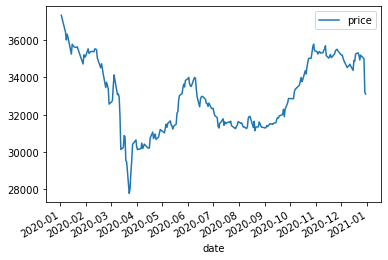

<Figure size 720x504 with 0 Axes>

In [8]:
#월별가격
.plot(x="date",y="price")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.figure(figsize=(10,7))
plt.show()

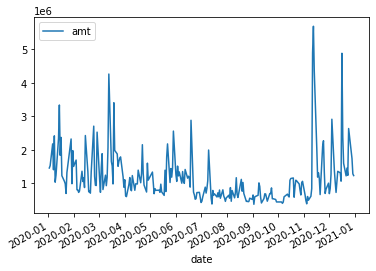

<Figure size 720x504 with 0 Axes>

In [9]:
#월별 거래량
new_df.plot(x="date",y="amt")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.figure(figsize=(10,7))
plt.show()

In [10]:
# 거래량이 가장 높은 데이터 10개
new_df3=new_df.sort_values(by=['amt'], axis = 0, ascending=True).iloc[238:]
new_df3

,date,price,amt,price_diff,price_change,price_updown
212,2020-02-24,33460,2703512,-722.00,-2.11,down
132,2020-06-19,32961,2878485,-31.00,-0.09,same
17,2020-12-04,34905,2910301,-140.00,-0.40,same
239,2020-01-14,35252,3334474,-239.00,-0.67,same
194,2020-03-19,29540,3402131,-1278.00,-4.15,down
198,2020-03-13,30140,4259132,-1801.00,-5.64,down
32,2020-11-13,35170,4353288,-525.00,-1.47,same
9,2020-12-16,34910,4878990,530.00,1.54,same
34,2020-11-11,35505,4890629,42.00,0.12,same
33,2020-11-12,35695,5685100,190.00,0.54,same


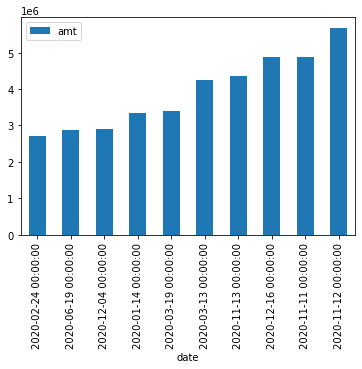

<Figure size 720x720 with 0 Axes>

In [11]:
new_df3.plot.bar(x='date',y='amt')
plt.figure(figsize=(10,10))
plt.show()